https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2

(깃허브 코드로 공부했음)

In [62]:
%autosave 60

Autosaving every 60 seconds


In [63]:
!pip install  smart_open 
!pip install  pyarrow #csv 데이터 빠르게 읽기
!pip install  seaborn 

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow_p36/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow_p36/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow_p36/bin/python -m pip install --upgrade pip' command.


In [64]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [65]:
print(fruits.shape)

(59, 7)


In [66]:
print(fruits['fruit_name'].unique()) #과일 종류 파악하기 

['apple' 'mandarin' 'orange' 'lemon']


In [67]:
print(fruits.groupby('fruit_name').size()) #종류별 개수

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


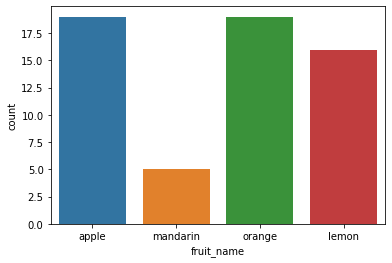

In [68]:
import seaborn as sns
sns.countplot(fruits['fruit_name'],label="Count") #countplot: 범주형 변수의 빈도수 시각화
plt.show()


## Visualization


drop = 삭제  axis=1 : 열 삭제  plot: 종류  subplots=True??  
subplot은 일일히 설정, subplots는 한번에  
sharex=False, sharey=False: x,y 범위 각각 다르게 출력  
figsize = 인치 단위



/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax

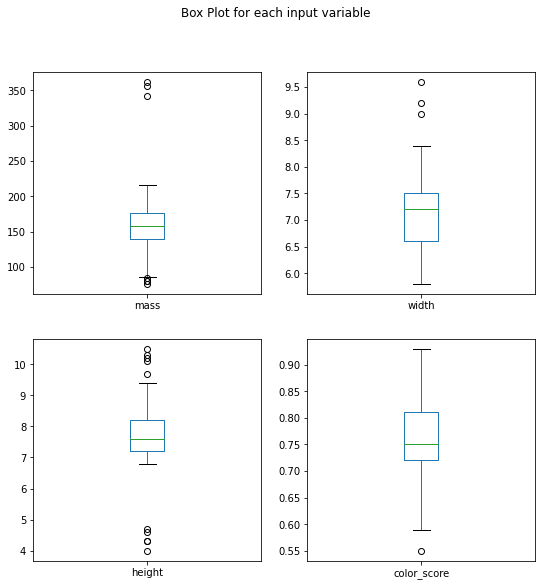

In [69]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

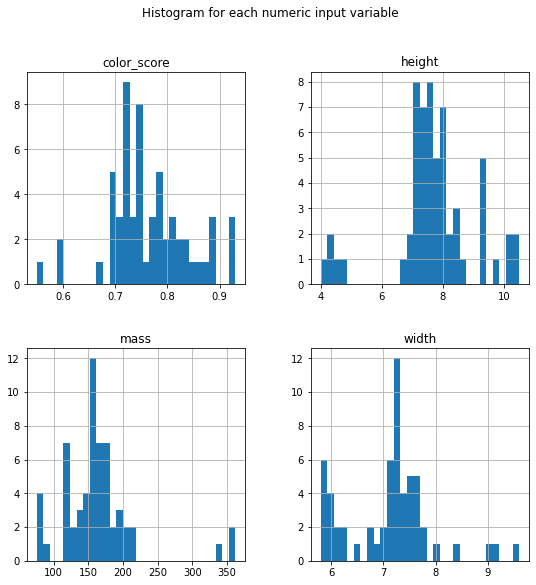

In [70]:
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

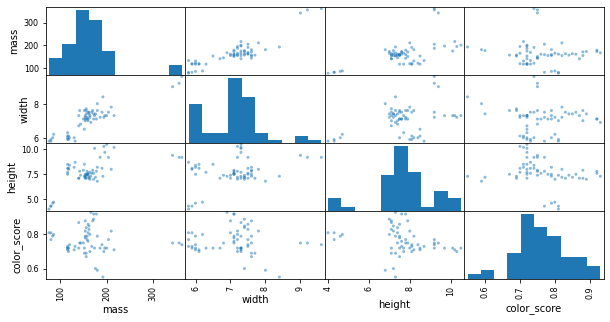

In [84]:
import pandas.plotting 
#from pandas.plotting import scatter_matrix 항상 이렇게는 안 해도 됨, 간편하게 하기 위해서

scatter_matrix(fruits.drop('fruit_label', axis=1), figsize=(10, 5))
plt.show()

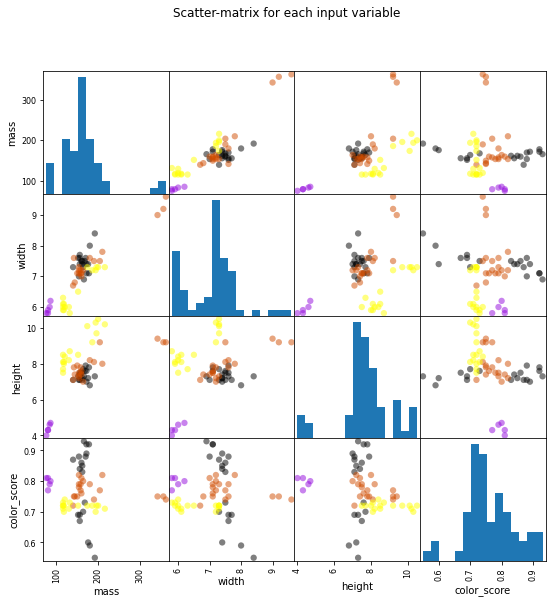

In [85]:
from pandas.plotting import scatter_matrix as sm
from matplotlib import cm
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
cmap = cm.get_cmap('gnuplot') # ? 
scatter = sm(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)#?
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

## Statistical Summary

In [73]:
X.describe()

,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000
mean,163.118644,7.105085,7.693220,0.762881
std,55.018832,0.816938,1.361017,0.076857
min,76.000000,5.800000,4.000000,0.550000
25%,140.000000,6.600000,7.200000,0.720000
50%,158.000000,7.200000,7.600000,0.750000
75%,177.000000,7.500000,8.200000,0.810000
max,362.000000,9.600000,10.500000,0.930000



## Create Training and Test Sets and Apply Scaling

arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)

test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)

train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)

random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)

shuffle : 셔플여부설정 (default = True)

stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.

[출처] [Python] sklearn의 train_test_split() 사용법|작성자 Paris Lee

**X(대문자): 데이터, y(소문자): 레이블**

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



## Build Models


### Logistic Regression - 범주가 두 개 이상일 때도 가능

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.47



### Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.73



### K-Nearest Neighbors  
  
주변에 가까이 있는 k개를 살펴보고 가장 많은 것으로 결정

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  

k 디폴트값: 5  


In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


training set보다 test set의 정확도 더 높을 수 있음
(test에 어쩌다 쉬운 값이 들어갔을 때 ...)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(4)
knn2.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn2.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn2.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.93



### Linear Discriminant Analysis  LDA

분산대비 평균의 차이를 최대화하는 직선을 찾아서 그 직선으로 집단 분류

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67



### Gaussian Naive Bayes  

통계적 분류기법  
예) 온도, 습도에 따른 축구 여부 확률 구하기

In [80]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67



### Support Vector Machine  

주어진 데이터가 어느 카테고리에 속할지 판단하는 이진 선형 분류 모델  
(구분선 통해서)


In [81]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.91
Accuracy of SVM classifier on test set: 0.80


 
 
 
The KNN algorithm was the most accurate model that we tried. The confusion matrix provides an indication of no error made on the test set. However, the test set was very small.

- confustion matrix: 학습을 통한 예측 성능을 측정하기 위해 예측값과 실제값을 정리해놓은 표  
- precision: 모델이 분류한 값이 실제값일 비율  
- reacall: 실제값과 동일한 모델값이라 분류한 비율  
- accuracy: 전체 중 모델이 바르게 분류한 비율  
- f1 score: precision과 recall의 조화평균 **(데이터가 불균형할 때 씀)**

In [82]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15





## Plot the Decision Boundary of the k-NN Classifier

In [22]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = np.array(X[['height', 'width']])
    y_mat = np.array(y)
    #X_mat = X[['height', 'width']].as_matrix()
    #y_mat = y.as_matrix()
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
    # print(X_mat)
    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                     np.arange(y_min, y_max, mesh_step_size))
    #print(np.c_[xx.ravel(), yy.ravel()])
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    #plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))    
    plt.show()

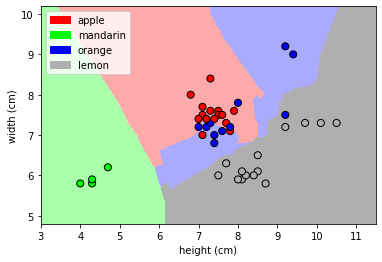

In [23]:
plot_fruit_knn(X_train, y_train, 5, 'uniform')

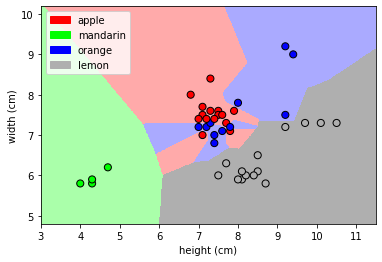

In [24]:
plot_fruit_knn(X_train, y_train, 1, 'uniform')

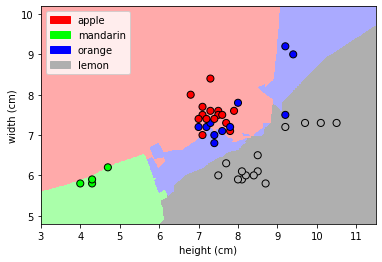

In [25]:
plot_fruit_knn(X_train, y_train, 10, 'uniform')

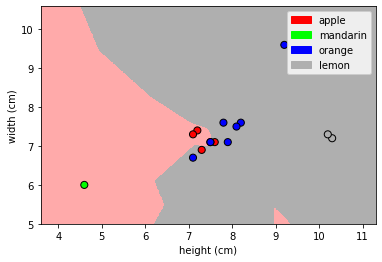

In [26]:
plot_fruit_knn(X_test, y_test, 5, 'uniform')

([<matplotlib.axis.XTick at 0x7fbfab9a7e10>,
 <a list of 5 Text major ticklabel objects>)

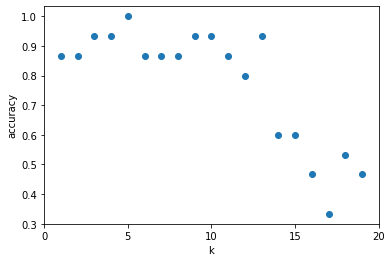

In [61]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])


Mean Error를 이용하여 정확도를 평가해볼 수도 있다.
https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/